<a href="https://colab.research.google.com/github/DanielRomeo/polynomial-regression-model/blob/master/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Position_Salaries.csv to Position_Salaries.csv


In [5]:
dataset = pd.read_csv(io.BytesIO(uploaded['Position_Salaries.csv']))

In [26]:
#create a matrix fro independent variables:
X = dataset.iloc[:, 1:2].values #make sure that this is a matrix and not a vector
y = dataset.iloc[:, 2].values 

In [ ]:
print(X)

For this one, we are not gonna split the training set and test set... cos we wanna make best possible prediction. so we include all the data.

In [27]:
#
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
#fitting polynmial regression to the dataset:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X) #we fit and immidiately transform the data into the variable...

In [75]:
print(X_poly)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


In [76]:
#now we create a regression model for the polynomial...
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

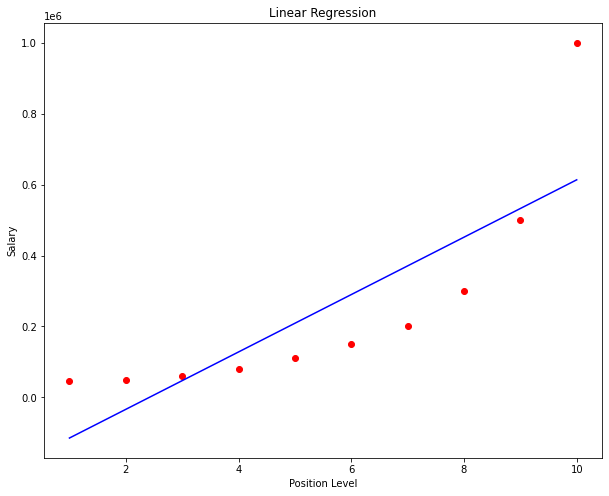

In [77]:
#visualizing THE linear regression result:
plt.figure(figsize=(10,8), facecolor='white')
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

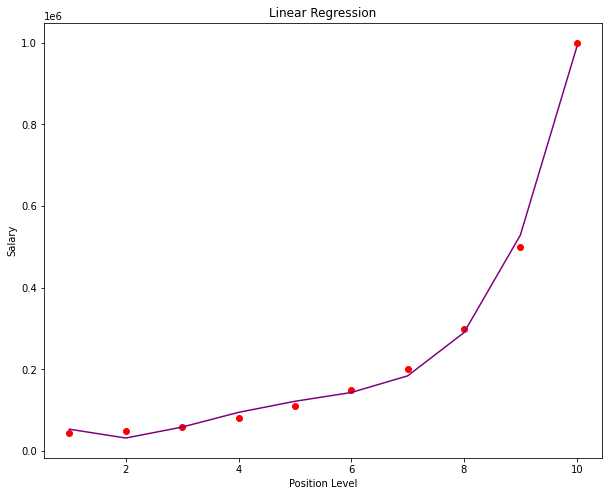

In [78]:
#visualizing the data via the polynomial regressor


#visualizing THE linear regression result:
plt.figure(figsize=(10,8),facecolor='white')
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict( poly_reg.fit_transform(X) ), color='purple')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

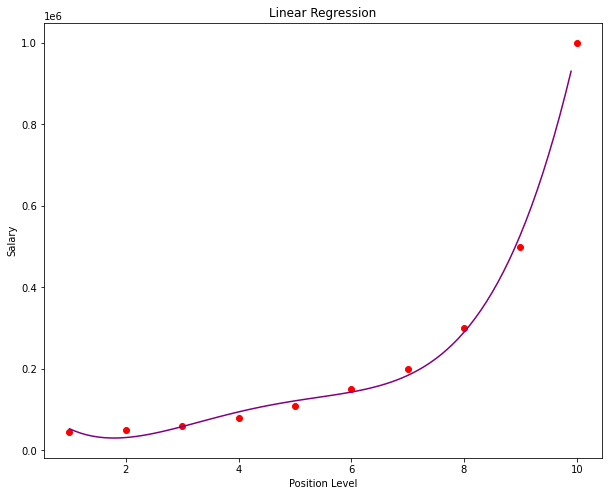

In [80]:
#vthis time, we make the chart more curvious meaning it draws the actual polynomial graph:
'''
basically we are giving our model alot of small data points so that it can draw for each one... ------ insted of -  -  -  -
in order to make the model smoother
'''

X_grid = np.arange(min(X), max(X), 0.1) #this returns vector, so i need to convert it into matrix.
X_grid = X_grid.reshape( (len(X_grid), 1) )


#visualizing THE linear regression result:
plt.figure(figsize=(10,8),facecolor='white')
plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg_2.predict( poly_reg.fit_transform(X_grid) ), color='purple')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()